In [2]:
#importing stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
#### Notre matrice
exp = np.array([[8, 1, 0],
                [4, 6, 5],
                [6, 8, 7],
                [10, 4, 7],
                [8, 2, 5],
                [0, 3, 6],
                ])
df = pd.DataFrame(data=exp, columns=["N1", "N2", "N3"])
print("\n Notre Matrice \n\n X=")
display(df)


 Notre Matrice 

 X=


,N1,N2,N3
0,8,1,0
1,4,6,5
2,6,8,7
3,10,4,7
4,8,2,5
5,0,3,6


In [4]:
print("\n =====> Etape 1: Centrer le tableau \n\n X-g =")
df1 = pd.DataFrame()
for i in df:
    df1[i] = df[i] - df[i].mean()
display(df1)


 =====> Etape 1: Centrer le tableau 

 X-g =


,N1,N2,N3
0,2.0,-3.0,-5.0
1,-2.0,2.0,0.0
2,0.0,4.0,2.0
3,4.0,0.0,2.0
4,2.0,-2.0,0.0
5,-6.0,-1.0,1.0


In [5]:
print(" =====> Etape 2: Calculer la matrice variance covariance \n\n V=")
V = 1 / df1.shape[0] * df1.T @ df1 
display(V)

 =====> Etape 2: Calculer la matrice variance covariance 

 V=


,N1,N2,N3
N1,10.666667,-1.333333,-1.333333
N2,-1.333333,5.666667,3.666667
N3,-1.333333,3.666667,5.666667


In [6]:
print(" =====> Etape 3: Détermination de la métrique")
print(" #### Les données sont homogènes #### \n\n M=")
m = np.zeros((V.shape[0], V.shape[0]))
np.fill_diagonal(m, 1)
M = pd.DataFrame(data=m)
display(M)

 =====> Etape 3: Détermination de la métrique
 #### Les données sont homogènes #### 

 M=


,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [7]:
print(" =====> Etape 4: Recherche des axes principaux 𝑼𝒌 de la matrice (VM)")
print(" #### Calculer les valeurs propres de la matrice (V.M) :")
VM = V
valeurs, vecteurs = np.linalg.eig(VM)
count = 0
for i in valeurs[::-1]:
    count += 1
    print("λ"+str(count)+" =", round(i))
print(" #### Trier les valeurs propres par ordre décroissant :")
sorted_valeurs = np.sort(valeurs)[::-1]
rounded_arr = np.round(sorted_valeurs, decimals=1) #rounding up the values cause they changed for some reason
list_valeurs = rounded_arr.tolist()
count = 0
for i in list_valeurs:
    count += 1
    print("λ"+str(count)+" =", round(i))


 =====> Etape 4: Recherche des axes principaux 𝑼𝒌 de la matrice (VM)
 #### Calculer les valeurs propres de la matrice (V.M) :
λ1 = 2
λ2 = 8
λ3 = 12
 #### Trier les valeurs propres par ordre décroissant :
λ1 = 12
λ2 = 8
λ3 = 2


In [8]:
print(" =====> Calculer la qualité de représentation :")
q = 0
ls = 0
list_valeurs_principaux = []
for i in list_valeurs:
    if q < 0.8:
        ls += i
        list_valeurs_principaux.append(i)
        q = ls / sum(list_valeurs)
print("Q =",q)
count = 0
print(" #### Les valeurs principaux sont:")
for i in list_valeurs_principaux:
    count += 1
    print("λ"+str(count)+" =", round(i))

 =====> Calculer la qualité de représentation :
Q = 0.9090909090909091
 #### Les valeurs principaux sont:
λ1 = 12
λ2 = 8


In [9]:
print(" =====> Etape 6: Calculer les vecteurs propres 𝑼𝒌 :")
list_vecteurs_principaux = []
for i in range(len(list_valeurs_principaux)):
    list_vecteurs_principaux.append(vecteurs[i])
count = 0
for i in list_vecteurs_principaux:
    count+= 1
    print("U"+str(count)+" =", i)

 =====> Etape 6: Calculer les vecteurs propres 𝑼𝒌 :
U1 = [ 8.16496581e-01 -5.77350269e-01  1.39563774e-17]
U2 = [-0.40824829 -0.57735027 -0.70710678]


In [10]:
print(" =====> Etape 7: Calculer les composantes principales :")
list_composantes_principales =  []
for i in range(len(list_vecteurs_principaux)):
    list_composantes_principales.append(df1.values.dot(list_vecteurs_principaux[i]))
C = pd.DataFrame()
count = 0
for i in list_composantes_principales:
    count += 1
    C["U"+str(count)] = i
print(" #### Le nouveau espace: \n\n C =")
print(C)

 =====> Etape 7: Calculer les composantes principales :
 #### Le nouveau espace: 

 C =
         U1        U2
0  3.365044  4.451088
1 -2.787694 -0.338204
2 -2.309401 -3.723615
3  3.265986 -3.047207
4  2.787694  0.338204
5 -4.321629  2.319733


 =====> Etape 8: Représenter graphiquement


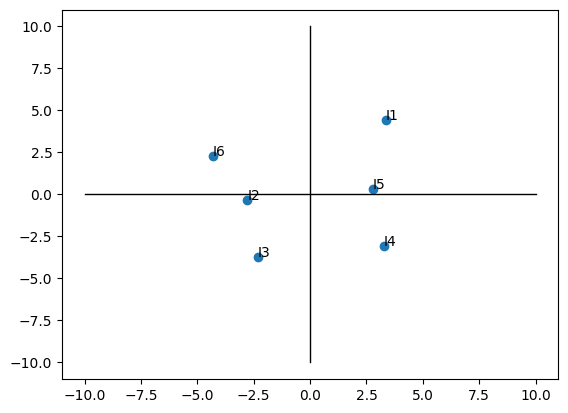

In [11]:
print(" =====> Etape 8: Représenter graphiquement")
# Draw the black lines
plt.plot([-10, 10], [0, 0], 'k-', lw=1)
plt.plot([0, 0], [-10, 10], 'k-', lw=1)

plt.scatter(C["U1"], C["U2"])
n = []
for i in range(len(C.index)):
    n.append("I"+str(i+1))
for i, txt in enumerate(n):
    plt.annotate(txt, (C["U1"][i], C["U2"][i]))

In [12]:
print(" =====> Etape 9: Les contributions aux inerties : \n")
print(" #### Part d’inertie de 𝑋𝑖 prise en compte par l’axe 𝑈𝑘 \n")
count = 0
l = []
for i in range(len(list_vecteurs_principaux)):
    count += 1
    individu = 0
    print("Pour l'axe U"+str(count), "  K =", str(count))
    for index, row in df1.iterrows():
            X = np.array([row[0], row[1], row[2]])
            cos = np.dot(X, list_vecteurs_principaux[i])**2 / sum(X**2)
            individu += 1
            l.append(cos)
            print("cos²(O"+str(individu)+str(count)+") =", cos)
    print("\n")

 =====> Etape 9: Les contributions aux inerties : 

 #### Part d’inertie de 𝑋𝑖 prise en compte par l’axe 𝑈𝑘 

Pour l'axe U1   K = 1
cos²(O11) = 0.29798739253050105
cos²(O21) = 0.9714045207910313
cos²(O31) = 0.2666666666666662
cos²(O41) = 0.5333333333333338
cos²(O51) = 0.9714045207910313
cos²(O61) = 0.4914862916800257


Pour l'axe U2   K = 2
cos²(O12) = 0.5213733043142137
cos²(O22) = 0.014297739604484265
cos²(O32) = 0.6932652990377572
cos²(O42) = 0.4642734410091829
cos²(O52) = 0.014297739604484265
cos²(O62) = 0.14160953321089545




In [13]:
print(" Représente la contribution de l’individu par rapport au nouvel espace \n\n")
half = len(l) // 2
cos1 = l[:half]
cos2 = l[half:]
count = 0
for i in range(len(cos1)):
    count += 1
    print("p"+str(count) + " =", cos1[i] + cos2[i])

 Représente la contribution de l’individu par rapport au nouvel espace 


p1 = 0.8193606968447147
p2 = 0.9857022603955156
p3 = 0.9599319657044234
p4 = 0.9976067743425167
p5 = 0.9857022603955156
p6 = 0.6330958248909212


In [14]:
print('#### Contribution relative de l’individu 𝑋𝑖 à l’inertie expliquée de l’axe 𝑈𝑘:')
count = 0
for i in range(len(list_vecteurs_principaux)):
    count += 1
    individu = 0
    print("Pour l'axe U"+str(count), "  K =", str(count))
    for index, row in df1.iterrows():
            X = np.array([row[0], row[1], row[2]])
            pik = (X @list_vecteurs_principaux[i]**2 / df1.shape[0]) / list_valeurs_principaux[i]
            individu += 1
            print("p"+str(individu)+str(count)+" =", pik)
    print("\n")

#### Contribution relative de l’individu 𝑋𝑖 à l’inertie expliquée de l’axe 𝑈𝑘:
Pour l'axe U1   K = 1
p11 = 0.004629629629629668
p21 = -0.00925925925925929
p31 = 0.018518518518518486
p41 = 0.03703703703703707
p51 = 0.00925925925925929
p61 = -0.06018518518518523


Pour l'axe U2   K = 2
p12 = -0.06597222222222225
p22 = 0.0069444444444444675
p32 = 0.048611111111111126
p42 = 0.03472222222222219
p52 = -0.0069444444444444675
p62 = -0.017361111111111056




In [16]:
print(" =====> Etape 10: Représentation des variables à l’aide du coefficient de corrélation:")
cor1 = 1 / df1.shape[0] * (df1['N1'] @ C['U1']) / (math.sqrt(V["N1"]["N1"]) * math.sqrt(list_valeurs_principaux[0]))
cor2 = 1 / df1.shape[0] * (df1['N1'] @ C['U2']) / (math.sqrt(V["N1"]["N1"]) * math.sqrt(list_valeurs_principaux[1]))

cor3 = 1 / df1.shape[0] * (df1['N2'] @ C['U1']) / (math.sqrt(V["N2"]["N2"]) * math.sqrt(list_valeurs_principaux[0]))
cor4 = 1 / df1.shape[0] * (df1['N2'] @ C['U2']) / (math.sqrt(V["N2"]["N2"]) * math.sqrt(list_valeurs_principaux[1]))

cor5 = 1 / df1.shape[0] * (df1['N3'] @ C['U1']) / (math.sqrt(V["N3"]["N3"]) * math.sqrt(list_valeurs_principaux[0]))
cor6 = 1 / df1.shape[0] * (df1['N3'] @ C['U2']) / (math.sqrt(V["N3"]["N3"]) * math.sqrt(list_valeurs_principaux[1]))

corr = pd.DataFrame({"U1": [cor1, cor3, cor5], "U2": [cor2, cor4, cor6]}, index=["N1", 'N2', 'N3'])
display(corr)

 =====> Etape 10: Représentation des variables à l’aide du coefficient de corrélation:


,U1,U2
N1,0.837842,-0.286009
N2,-0.528766,-0.790144
N3,-0.388738,-0.828688


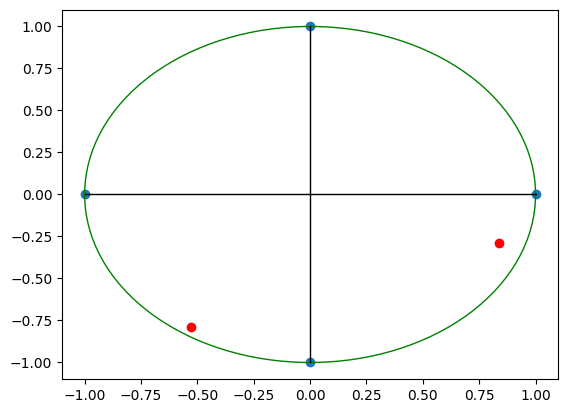

In [17]:
# the correlation coefficients represantation for each variable
x = [-1, 1, 0, 0]
y = [0, 0, -1, 1]

fig, ax = plt.subplots()
plt.scatter(x, y)

# draw a circle around the points
circle = plt.Circle((0, 0), radius=1, facecolor='none', edgecolor='green')
ax.add_artist(circle)

ax.plot([-1, 1], [0, 0], 'k-', lw=1)
ax.plot([0, 0], [-1, 1], 'k-', lw=1)


ax.scatter([cor1, cor3], [cor2, cor4], c='r')

plt.show()